In [571]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from statistics import mode
from kmodes.kmodes import KModes

In [572]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
%matplotlib inline

Leemos los datos

In [573]:
df = pd.read_csv('data/TyT/Resultados_Saber_TyT_Gen_ricas_2020-1.csv')

C:\Users\David\AppData\Local\Temp\ipykernel_15596\1842402721.py:1: DtypeWarning: Columns (9,10,11,12,13,14,15,16,17,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/TyT/Resultados_Saber_TyT_Gen_ricas_2020-1.csv')


Se va a tener una exploracion de los datos en el siguiente orden:
1. Analisis General
2. Analisis Detallado

# 1. Analisis General

Vamos a tener una pequena visualizacion de los datos

In [574]:
df.head(20)


,ESTU_TIPODOCUMENTO,ESTU_NACIONALIDAD,ESTU_GENERO,ESTU_FECHANACIMIENTO,ESTU_EXTERIOR,PERIODO,ESTU_CONSECUTIVO,ESTU_ESTUDIANTE,ESTU_PAIS_RESIDE,ESTU_DISC_FISICA,ESTU_DISC_SISTEM,ESTU_DISC_AUDITCASTELL,ESTU_DISC_AUDITLSC,ESTU_DISC_VISUALCEGUE,ESTU_DISC_VISUALBAJA,ESTU_DISC_VOZHABLA,ESTU_DISC_INTELEC,ESTU_DISC_ESPAUTISTA,ESTU_DISC_PSICOSOCIAL,ESTU_DISC_ASPERGER,ESTU_DEPTO_RESIDE,ESTU_COD_RESIDE_DEPTO,ESTU_MCPIO_RESIDE,ESTU_COD_RESIDE_MCPIO,ESTU_AREARESIDE,ESTU_ESTADOCIVIL,ESTU_COLE_TERMINO,ESTU_CODDANE_COLE_TERMINO,ESTU_COD_COLE_MCPIO_TERMINO,ESTU_OTROCOLE_TERMINO,ESTU_TITULOOBTENIDOBACHILLER,ESTU_PAGOMATRICULABECA,ESTU_PAGOMATRICULACREDITO,ESTU_PAGOMATRICULAPADRES,ESTU_PAGOMATRICULAPROPIO,ESTU_COMOCAPACITOEXAMENSB11,ESTU_TIPODOCUMENTOSB11,ESTU_SEMESTRECURSA,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,FAMI_TRABAJOLABORPADRE,FAMI_TRABAJOLABORMADRE,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_TIENESERVICIOTV,FAMI_TIENECOMPUTADOR,FAMI_TIENELAVADORA,FAMI_TIENEHORNOMICROOGAS,FAMI_TIENEAUTOMOVIL,FAMI_TIENEMOTOCICLETA,FAMI_TIENECONSOLAVIDEOJUEGOS,FAMI_CUANTOSCOMPARTEBAÑO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,INST_COD_INSTITUCION,INST_NOMBRE_INSTITUCION,ESTU_PRGM_ACADEMICO,ESTU_SNIES_PRGMACADEMICO,GRUPOREFERENCIA,ESTU_PRGM_CODMUNICIPIO,ESTU_PRGM_MUNICIPIO,ESTU_PRGM_DEPARTAMENTO,ESTU_NIVEL_PRGM_ACADEMICO,ESTU_METODO_PRGM,ESTU_NUCLEO_PREGRADO,ESTU_INST_CODMUNICIPIO,ESTU_INST_MUNICIPIO,ESTU_INST_DEPARTAMENTO,INST_CARACTER_ACADEMICO,INST_ORIGEN,ESTU_PRIVADO_LIBERTAD,ESTU_COD_MCPIO_PRESENTACION,ESTU_MCPIO_PRESENTACION,ESTU_DEPTO_PRESENTACION,ESTU_COD_DEPTO_PRESENTACION,MOD_RAZONA_CUANTITAT_PUNT,MOD_RAZONA_CUANTITATIVO_PNAL,MOD_RAZONA_CUANTITATIVO_PNBC,MOD_LECTURA_CRITICA_PUNT,MOD_LECTURA_CRITICA_PNAL,MOD_LECTURA_CRITICA_PNBC,MOD_COMPETEN_CIUDADA_PUNT,MOD_COMPETEN_CIUDADA_PNAL,MOD_COMPETEN_CIUDADA_PNBC,MOD_INGLES_PUNT,MOD_INGLES_DESEM,MOD_INGLES_PNAL,MOD_INGLES_PNBC,MOD_COMUNI_ESCRITA_PUNT,MOD_COMUNI_ESCRITA_DESEM,MOD_COMUNI_ESCRITA_PNAL,MOD_COMUNI_ESCRITA_PNBC,PUNT_GLOBAL,PERCENTIL_GLOBAL,PERCENTIL_NBC,ESTU_ESTADOINVESTIGACION
0,CC,COLOMBIA,M,09/16/1986 12:00:00 AM,NO,20201,EK202010002443,ESTUDIANTE,COLOMBIA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CALDAS,17.0,MANIZALES,17001.0,Cabecera Municipal,Unión libre,NaN,NaN,NaN,colegio anglo frances,Bachiller académico,No,No,No,Si,Repasó por cuenta propia,CC,08,Educación profesional incompleta,Secundaria (Bachillerato) completa,No sabe,Es dueño de un negocio pequeño (tiene pocos em...,Estrato 3,Si,Si,Si,Si,Si,Si,No,No,2,Entre un millon y 3 millones de pesose,Más de 30 horas,2818,CORPORACION UNIVERSITARIA DE SANTA ROSA DE CAB...,TECNOLOGIA EN PRODUCCION ANIMAL,2026.0,TECNOLÓGICO EN CIENCIAS AGROPECUARIAS,66682,SANTA ROSA DE CABAL,RISARALDA,TECNOLOGÍA,PRESENCIAL,ZOOTECNIA,66682,SANTA ROSA DE CABAL,RISARALDA,INSTITUCIÓN UNIVERSITARIA,NO OFICIAL - CORPORACIÓN,N,11001,BOGOTÁ D.C.,BOGOTÁ,11,84,43.0,56.0,86,36.0,52.0,105,57.0,68.0,55.0,-A1,5.0,9.0,0.0,NaN,1.0,1.0,66,9.0,17.0,PUBLICAR
1,CC,COLOMBIA,F,01/12/1996 12:00:00 AM,NO,20201,EK202010083686,ESTUDIANTE,COLOMBIA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RISARALDA,66.0,SANTA ROSA DE CABAL,66682.0,Cabecera Municipal,Soltero,SE LORENCITA VILLEGAS - SEDE PRINCIPAL,1.666820e+11,66682.0,NaN,Bachiller académico,No,Si,No,No,No realizó ninguna prueba de preparación,TI,06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2818,CORPORACION UNIVERSITARIA DE SANTA ROSA DE CAB...,TECNOLOGIA EN DESARROLLO DE SISTEMAS INFORM¿TICOS,104837.0,TECNOLÓGICO EN TIC,66682,SANTA ROSA DE CABAL,RISARALDA,TECNOLOGÍA,PRESENCIAL,"INGENIERÍA DE SISTEMAS, TELEMÁTICA Y AFINES",66682,SANTA ROSA DE CABAL,RISARALDA,INSTITUCIÓN UNIVERSITARIA,NO OFICIAL - CORPORACIÓN,N,11001,BOGOTÁ D.C.,BOGOTÁ,11,107,77.0,68.0,139,98.0,96.0,98,47.0,41.0,108.0,A2,63.0,50.0,134.0,4.0,95.0,93.0,117,89.0,83.0,PUBLICAR
2,CC,COLOMBIA,M,01/28/1992 12:00:00 AM,NO,20201,EK202010000826,ESTUDIANTE,COLOMBIA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CORDOBA,23.0,BUENAVISTA,23079.0,Cabecer

Haciendo un analisis de primera impresion, podemos hacer un descarte de las siguientes variables:
- PERIODO
- ESTU_CONSECUTIVO
- ESTU_COD_RESIDE_DEPTO
- ESTU_MCPIO_RESIDE
- ESTU_COD_RESIDE_MCPIO
- ESTU_COLE_TERMINO
- ESTU_CODDANE_COLE_TERMINO
- ESTU_COD_COLE_MCPIO_TERMINO
- ESTU_OTROCOLE_TERMINO
- ESTU_TIPODOCUMENTOSB11
- FAMI_CUANTOSCOMPARTEBAÑO
- INST_COD_INSTITUCION
- INST_NOMBRE_INSTITUCION
- ESTU_SNIES_PRGMACADEMICO
- ESTU_PRGM_ACADEMICO
- ESTU_PRGM_CODMUNICIPIO
- ESTU_PRGM_MUNICIPIO
- ESTU_PRGM_DEPARTAMENTO
- GRUPOREFERENCIA
- ESTU_INST_CODMUNICIPIO
- ESTU_INST_MUNICIPIO
- ESTU_PRIVADO_LIBERTAD
- ESTU_COD_MCPIO_PRESENTACION
- ESTU_MCPIO_PRESENTACION
- ESTU_COD_DEPTO_PRESENTACION
- MOD_RAZONA_CUANTITATIVO_PNAL
- MOD_RAZONA_CUANTITATIVO_PNBC
- MOD_LECTURA_CRITICA_PNAL
- MOD_LECTURA_CRITICA_PNBC
- MOD_COMPETEN_CIUDADA_PNAL
- MOD_COMPETEN_CIUDADA_PNBC
- MOD_INGLES_DESEM
- MOD_INGLES_PNAL
- MOD_INGLES_PNBC
- MOD_COMUNI_ESCRITA_DESEM
- MOD_COMUNI_ESCRITA_PNAL
- MOD_COMUNI_ESCRITA_PNBC
- PERCENTIL_GLOBAL
- PERCENTIL_NBC
- ESTU_ESTADOINVESTIGACION
- ESTU_DISC_FISICA
- ESTU_DISC_SISTEM
- ESTU_DISC_AUDITCASTELL
- ESTU_DISC_AUDITLSC
- ESTU_DISC_VISUALCEGUE
- ESTU_DISC_VISUALBAJA
- ESTU_DISC_VOZHABLA
- ESTU_DISC_INTELEC
- ESTU_DISC_ESPAUTISTA
- ESTU_DISC_PSICOSOCIAL
- ESTU_DISC_ASPERGER

Estas variables se descartan completamente, ya que o no existen valores para tomar en cuenta que sean relevantes o directamente son irrelevantes

In [575]:
df = df.drop('PERIODO', axis=1)
df = df.drop('ESTU_CONSECUTIVO', axis=1)
df = df.drop('ESTU_COD_RESIDE_DEPTO', axis=1)
df = df.drop('ESTU_MCPIO_RESIDE', axis=1)
df = df.drop('ESTU_COD_RESIDE_MCPIO', axis=1)
df = df.drop('ESTU_COLE_TERMINO', axis=1)
df = df.drop('ESTU_CODDANE_COLE_TERMINO', axis=1)
df = df.drop('ESTU_COD_COLE_MCPIO_TERMINO', axis=1)
df = df.drop('ESTU_OTROCOLE_TERMINO', axis=1)
df = df.drop('ESTU_TIPODOCUMENTOSB11', axis=1)
df = df.drop('FAMI_CUANTOSCOMPARTEBAÑO', axis=1)
df = df.drop('INST_COD_INSTITUCION', axis=1)
df = df.drop('INST_NOMBRE_INSTITUCION', axis=1)
df = df.drop('ESTU_SNIES_PRGMACADEMICO', axis=1)
df = df.drop('ESTU_PRGM_ACADEMICO', axis=1)
df = df.drop('ESTU_PRGM_CODMUNICIPIO', axis=1)
df = df.drop('ESTU_PRGM_MUNICIPIO', axis=1)
df = df.drop('ESTU_PRGM_DEPARTAMENTO', axis=1)
df = df.drop('GRUPOREFERENCIA', axis=1)
df = df.drop('ESTU_INST_CODMUNICIPIO', axis=1)
df = df.drop('ESTU_INST_MUNICIPIO', axis=1)
df = df.drop('ESTU_PRIVADO_LIBERTAD', axis=1)
df = df.drop('ESTU_COD_MCPIO_PRESENTACION', axis=1)
df = df.drop('ESTU_MCPIO_PRESENTACION', axis=1)
df = df.drop('ESTU_COD_DEPTO_PRESENTACION', axis=1) 
df = df.drop('MOD_RAZONA_CUANTITATIVO_PNAL', axis=1)
df = df.drop('MOD_RAZONA_CUANTITATIVO_PNBC', axis=1)
df = df.drop('MOD_LECTURA_CRITICA_PNAL', axis=1)
df = df.drop('MOD_LECTURA_CRITICA_PNBC', axis=1)
df = df.drop('MOD_COMPETEN_CIUDADA_PNAL', axis=1)
df = df.drop('MOD_COMPETEN_CIUDADA_PNBC', axis=1)
df = df.drop('MOD_INGLES_DESEM', axis=1)
df = df.drop('MOD_INGLES_PNAL', axis=1)
df = df.drop('MOD_INGLES_PNBC', axis=1)
df = df.drop('MOD_COMUNI_ESCRITA_DESEM', axis=1)
df = df.drop('MOD_COMUNI_ESCRITA_PNAL', axis=1)
df = df.drop('MOD_COMUNI_ESCRITA_PNBC', axis=1)
df = df.drop('PERCENTIL_GLOBAL', axis=1)
df = df.drop('PERCENTIL_NBC', axis=1)
df = df.drop('ESTU_ESTADOINVESTIGACION', axis=1)
df = df.drop('ESTU_DISC_FISICA', axis=1)
df = df.drop('ESTU_DISC_SISTEM', axis=1)
df = df.drop('ESTU_DISC_AUDITCASTELL', axis=1)
df = df.drop('ESTU_DISC_AUDITLSC', axis=1)
df = df.drop('ESTU_DISC_VISUALCEGUE', axis=1)
df = df.drop('ESTU_DISC_VISUALBAJA', axis=1)
df = df.drop('ESTU_DISC_VOZHABLA', axis=1)
df = df.drop('ESTU_DISC_INTELEC', axis=1)
df = df.drop('ESTU_DISC_ESPAUTISTA', axis=1)
df = df.drop('ESTU_DISC_PSICOSOCIAL', axis=1)
df = df.drop('ESTU_DISC_ASPERGER', axis=1)
df = df.drop('ESTU_TIPODOCUMENTO', axis=1)
df = df.drop('ESTU_NACIONALIDAD', axis=1)

Por ende tenemos las siguientes variables para analizar de forma detallada

In [576]:
df.dtypes

ESTU_GENERO                        object
ESTU_FECHANACIMIENTO               object
ESTU_EXTERIOR                      object
ESTU_ESTUDIANTE                    object
ESTU_PAIS_RESIDE                   object
ESTU_DEPTO_RESIDE                  object
ESTU_AREARESIDE                    object
ESTU_ESTADOCIVIL                   object
ESTU_TITULOOBTENIDOBACHILLER       object
ESTU_PAGOMATRICULABECA             object
ESTU_PAGOMATRICULACREDITO          object
ESTU_PAGOMATRICULAPADRES           object
ESTU_PAGOMATRICULAPROPIO           object
ESTU_COMOCAPACITOEXAMENSB11        object
ESTU_SEMESTRECURSA                 object
FAMI_EDUCACIONPADRE                object
FAMI_EDUCACIONMADRE                object
FAMI_TRABAJOLABORPADRE             object
FAMI_TRABAJOLABORMADRE             object
FAMI_ESTRATOVIVIENDA               object
FAMI_TIENEINTERNET                 object
FAMI_TIENESERVICIOTV               object
FAMI_TIENECOMPUTADOR               object
FAMI_TIENELAVADORA                

Para esta seccion vamos a analizar cada variable restante, revisar datos nulos o indefinidos para imputar, visualizar su grafico correspondiente y luego se va a determinar si realmente vale la pena tenerlo para la construccion del modelo

### Genero del estudiante

Revision de datos nulos

In [577]:
df['ESTU_GENERO'].isnull().sum()

128

Como se puede evidenciar de todos los estudiantes registrados existen 128 que no tienen genero agreado, en este caso voy a optar por la opcion de imputar el valor que mas se repita del conjunto de datos

In [578]:
mode_gender = mode(df['ESTU_GENERO'])
df['ESTU_GENERO'].fillna(mode_gender, inplace=True)

In [579]:
df['ESTU_GENERO'].isnull().sum()

0

Revisamos el grafico del genero

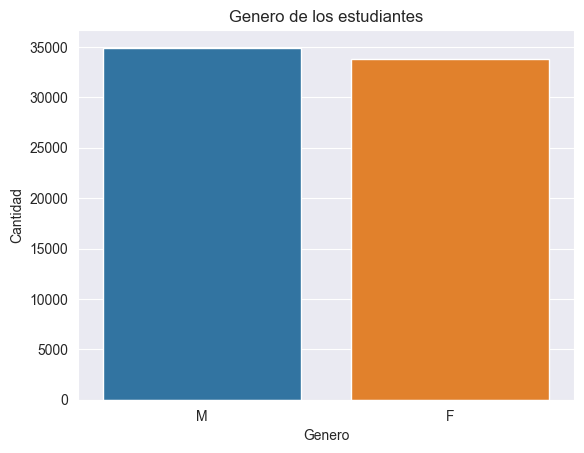

In [580]:
plt.figure()
sns.countplot(data=df, x=df['ESTU_GENERO'])
plt.title('Genero de los estudiantes')
plt.xlabel('Genero')
plt.ylabel('Cantidad')
plt.show()

Esta variable es interesante dejarla presente a la hora de crear el modelo de prediccion ya que el genero puede tener un impacto para el modelo

### Fecha de nacimiento del estudiante

Revision de los datos nulos

In [581]:
df['ESTU_FECHANACIMIENTO'].isnull().sum()

58

Como se puede evidenciar de todos los estudiantes registrados existen 58 que no tienen fecha de nacimiento agregada, en este caso voy a optar por la opcion de imputar el valor que mas se repita del conjunto de datos

Primero lo que hare es fijarme unicamente en el mes para reducir el alcance de la variable y porque considero que agreupar a las personas por el mes de nacimiento es mas efectivo

In [582]:
fecha_transform = []
for value in df['ESTU_FECHANACIMIENTO']:
    fecha_transform.append(str(value).split()[0])

In [583]:
for i in range(len(fecha_transform)):
    if fecha_transform[i] == 'nan':
        fecha_transform[i] = '00/00/0000'

In [584]:
for i in range(len(fecha_transform)):
    fecha_transform[i] = str(fecha_transform[i]).split("/")[0]

In [585]:
mode_month = mode(fecha_transform)
for i in range(len(fecha_transform)):
    if fecha_transform[i] == '00':
        fecha_transform[i] = mode_month

In [586]:
df['ESTU_FECHANACIMIENTO'] = fecha_transform

In [587]:
df['ESTU_FECHANACIMIENTO'].isnull().sum()

0

Vamos a tranformar el numero del mes a su respectivo nombre

In [588]:
def numero_a_mes(numero):
    fecha = datetime.strptime(numero,'%m')
    return fecha.strftime('%B')
df['ESTU_FECHANACIMIENTO'] = df['ESTU_FECHANACIMIENTO'].apply(numero_a_mes)

Revisamos el grafico de la fecha de nacimiento

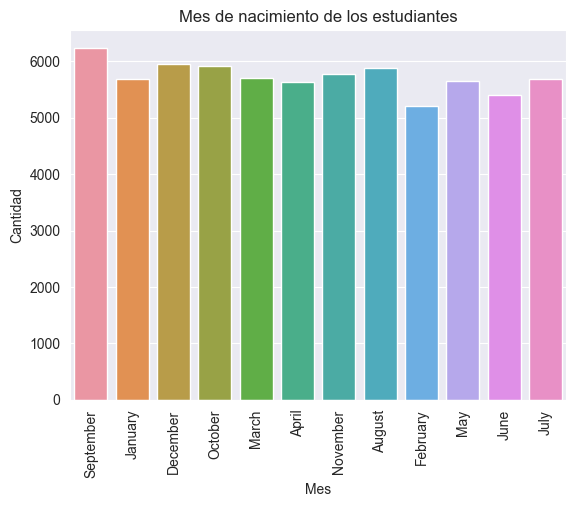

In [589]:
plt.figure()
sns.countplot(data=df, x=df['ESTU_FECHANACIMIENTO'])
plt.title('Mes de nacimiento de los estudiantes')
plt.xlabel('Mes')
plt.xticks(rotation=90)
plt.ylabel('Cantidad')
plt.show()

### Revisar si el estudiante es del exterior

Primeros vamos a visualizar la grafica

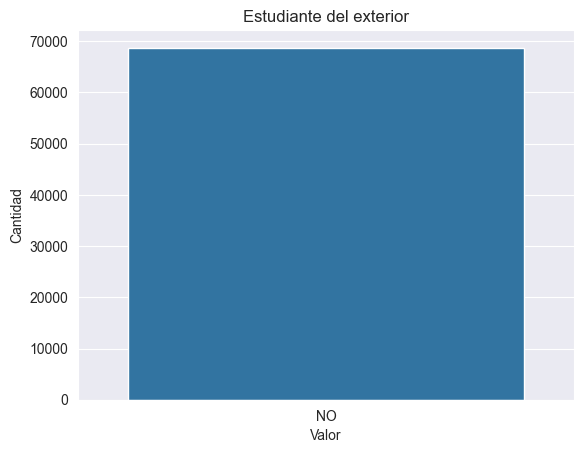

In [590]:
plt.figure()
sns.countplot(data=df, x=df['ESTU_EXTERIOR'])
plt.title('Estudiante del exterior')
plt.xlabel('Valor')
plt.ylabel('Cantidad')
plt.show()

Como se puede observar este es un valor que no tiene relevancia para la creacion del modelo ya que no aporta informacion relevante, por ende se va a descartar tambien

In [591]:
df = df.drop('ESTU_EXTERIOR', axis=1)

### Revisar si es estudiante

Primeros vamos a visualizar la grafica

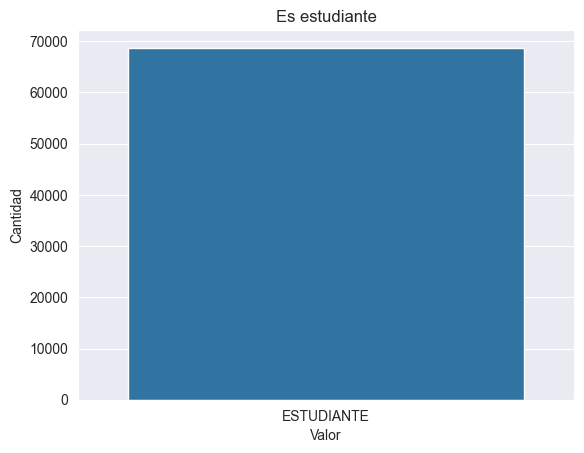

In [592]:
plt.figure()
sns.countplot(data=df, x=df['ESTU_ESTUDIANTE'])
plt.title('Es estudiante')
plt.xlabel('Valor')
plt.ylabel('Cantidad')
plt.show()

Como se puede observar este es un valor que no tiene relevancia para la creacion del modelo ya que no aporta informacion relevante, por ende se va a descartar tambien

In [593]:
df = df.drop('ESTU_ESTUDIANTE', axis=1)

### Pais donde reside el estudiante

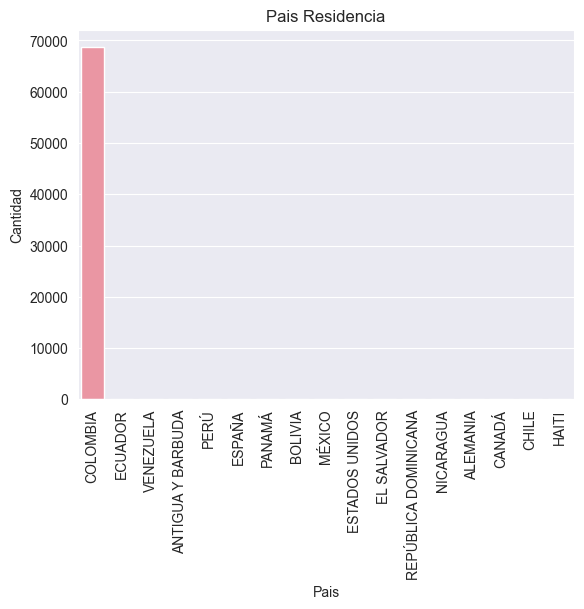

In [594]:
plt.figure()
sns.countplot(data=df, x=df['ESTU_PAIS_RESIDE'])
plt.title('Pais Residencia')
plt.xlabel('Pais')
plt.xticks(rotation=90)
plt.ylabel('Cantidad')
plt.show()

Como se puede observar este es un valor que no tiene relevancia para la creacion del modelo ya que no aporta informacion relevante, por ende se va a descartar tambien

In [595]:
df = df.drop('ESTU_PAIS_RESIDE', axis=1)

### Departamento donde reside el estudiante

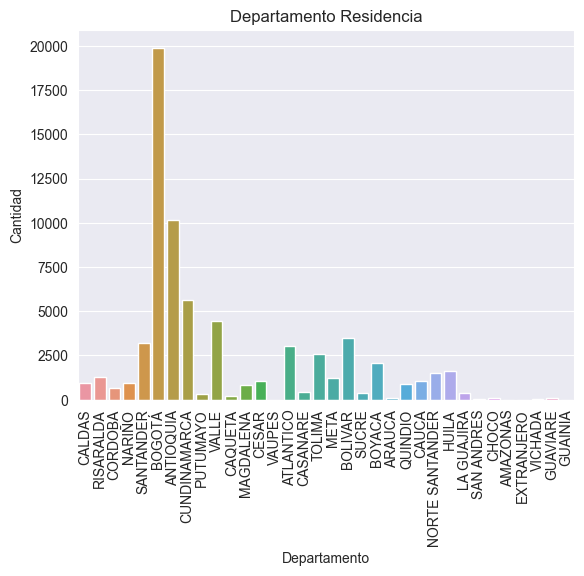

In [596]:
plt.figure()
sns.countplot(data=df, x=df['ESTU_DEPTO_RESIDE'])
plt.title('Departamento Residencia')
plt.xlabel('Departamento')
plt.xticks(rotation=90)
plt.ylabel('Cantidad')
plt.show()

Como se puede visualizar, existe mucha diversidad de variables en los datos, asi que optare por la opcion de una agrupacion pro medio de Kmeans, para este caso primero vamos a observar si estos datos tienen nulos para asi impurtarlos con la moda del departamento que mas se repite que seria Bogota

In [597]:
df['ESTU_DEPTO_RESIDE'].isnull().sum()

37

In [598]:
mode_dpto = mode(df['ESTU_DEPTO_RESIDE'])
df['ESTU_DEPTO_RESIDE'].fillna(mode_dpto, inplace=True)
df_original = df['ESTU_DEPTO_RESIDE']

In [599]:
df['ESTU_DEPTO_RESIDE'].isnull().sum()

0

In [600]:
kmodes = KModes(n_clusters=4, init='Huang', n_init=30, verbose=1)
kmodes.fit_predict(np.array(df['ESTU_DEPTO_RESIDE']).reshape(-1,1))

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 30908.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 30428.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 31633.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 30908.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 30908.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 6, iteration: 1/100, moves: 0, cost: 32908.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 7, iteration: 1/100, moves: 0, cost: 32027.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 8, iteration:

array([0, 0, 0, ..., 2, 2, 2], dtype=uint16)

In [601]:
grupos_dpto = kmodes.labels_
grupos_dpto = [str(numero) for numero in grupos_dpto]
for i in range(len(grupos_dpto)):
    if grupos_dpto[i] == '0':
        grupos_dpto[i] = 'Grupo 1'
    elif grupos_dpto[i] == '1':
        grupos_dpto[i] = 'Grupo 2'
    elif grupos_dpto[i] == '2':
        grupos_dpto[i] = 'Grupo 3'
    elif grupos_dpto[i] == '3':
        grupos_dpto[i] = 'Grupo 4'
grupos_dpto = pd.DataFrame(grupos_dpto)
df['ESTU_DEPTO_RESIDE'] = grupos_dpto

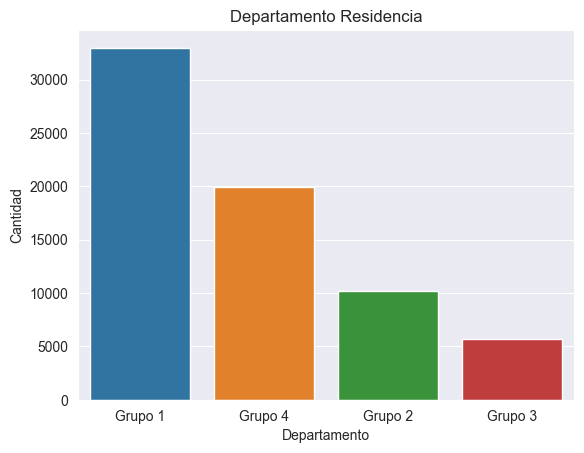

In [602]:
plt.figure()
sns.countplot(data=df, x=df['ESTU_DEPTO_RESIDE'])
plt.title('Departamento Residencia')
plt.xlabel('Departamento')
plt.ylabel('Cantidad')
plt.show()

Vamos a observar que departamentos quedaron en cada grupo

In [604]:
df_con_clusters = pd.DataFrame({'Datos originales': df_original, 'Clusters': kmodes.labels_})
for i in range(4):
    datos_en_cluster = df_con_clusters[df_con_clusters['Clusters'] == i]['Datos originales']
    print(f'Datos en el grupo {i+1}')
    print(list(set(datos_en_cluster)))

Datos en el grupo 1
['SAN ANDRES', 'ARAUCA', 'NARIÑO', 'CAQUETA', 'SANTANDER', 'PUTUMAYO', 'GUAVIARE', 'VICHADA', 'RISARALDA', 'CORDOBA', 'GUAINIA', 'MAGDALENA', 'VAUPES', 'VALLE', 'CESAR', 'HUILA', 'CALDAS', 'QUINDIO', 'BOYACA', 'ATLANTICO', 'LA GUAJIRA', 'EXTRANJERO', 'CHOCO', 'BOLIVAR', 'AMAZONAS', 'CAUCA', 'TOLIMA', 'CASANARE', 'NORTE SANTANDER', 'META', 'SUCRE']
Datos en el grupo 2
['ANTIOQUIA']
Datos en el grupo 3
['CUNDINAMARCA']
Datos en el grupo 4
['BOGOTÁ']
